In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\M RAJESH\Downloads\Refactor\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# droping customer id as it is not useful
df.drop("CustomerID",inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [4]:
#There is no null values or missing data 
df.shape

(200, 4)

In [5]:
df.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


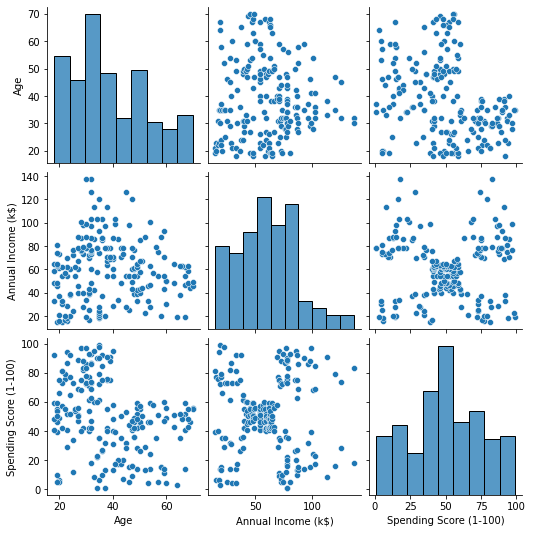

In [7]:
sns.pairplot(df)

From the above plot, we can aleardy visualize some clusters. Thus, we can say the features 'Spending Score (1-100)' and 'Annual Income (k$)' will have a great impact on the cluster segmentation, which we will see later in the notebook.

Not exact, but there is somewhat a negative relation between 'Age' and 'Spending Score (1-100)'. Customers with a higher age (40+) have a spending score less than 60. An opposite trend can be seen for young customers (age below 40). Most of them have a spending score above 40 and many are in the 70-100 spending score range.

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\M RAJESH\anac

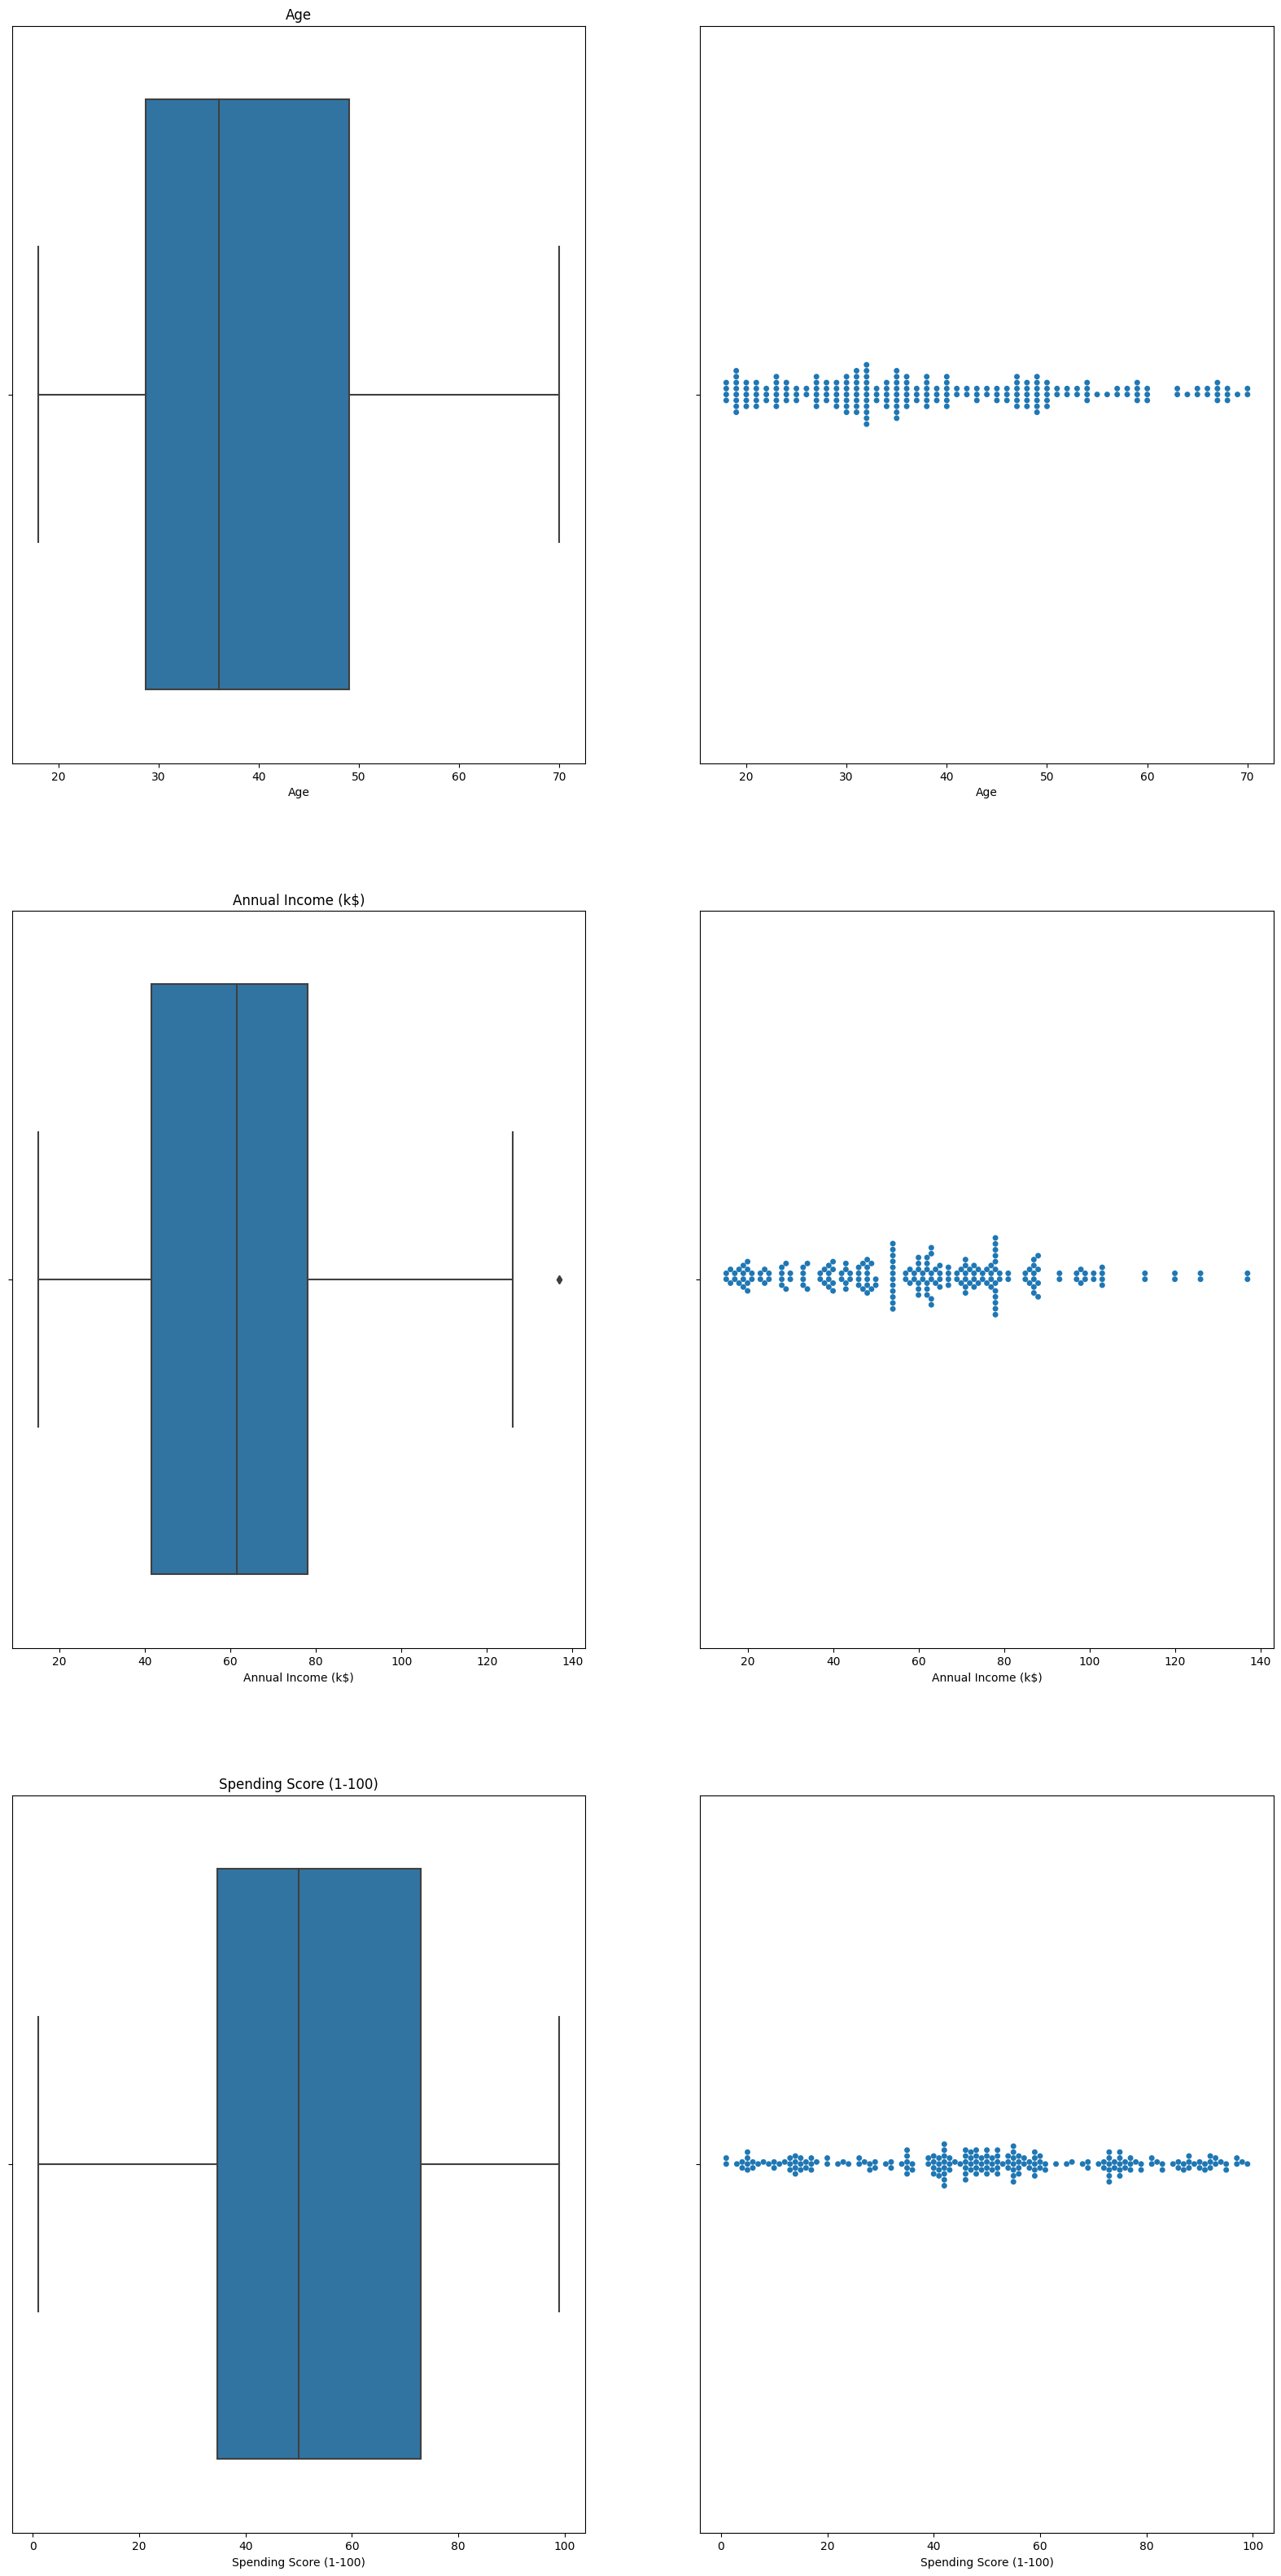

In [8]:
#along with boxplot plotting swarmplot to know no.of outlier points 
col_to_check=['Age','Annual Income (k$)','Spending Score (1-100)']
j=1
plt.figure(figsize=(20,40))
for i in col_to_check:
    plt.subplot(len(col_to_check),2,j)
    sns.boxplot(df[i])
    plt.title(i)
    j=j+1
    plt.subplot(len(col_to_check),2,j)
    sns.swarmplot(df[i])
    j=j+1

There is an outlier in the 'Annual Income (k$)' so we need to remove it

In [9]:
#removing of outlier
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>130,df['Annual Income (k$)'].mean(),df['Annual Income (k$)'])

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

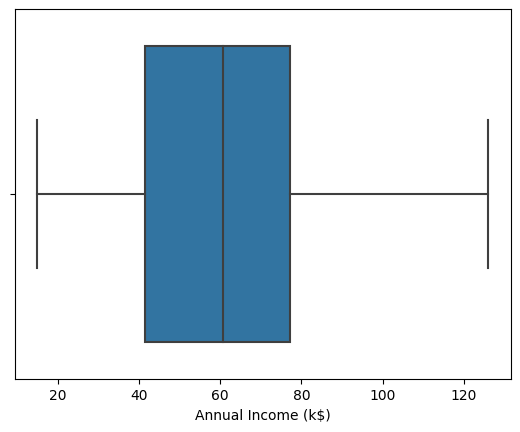

In [10]:
#checking the outlier got removed or not
sns.boxplot(df['Annual Income (k$)'])

now our data is free from outliers

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

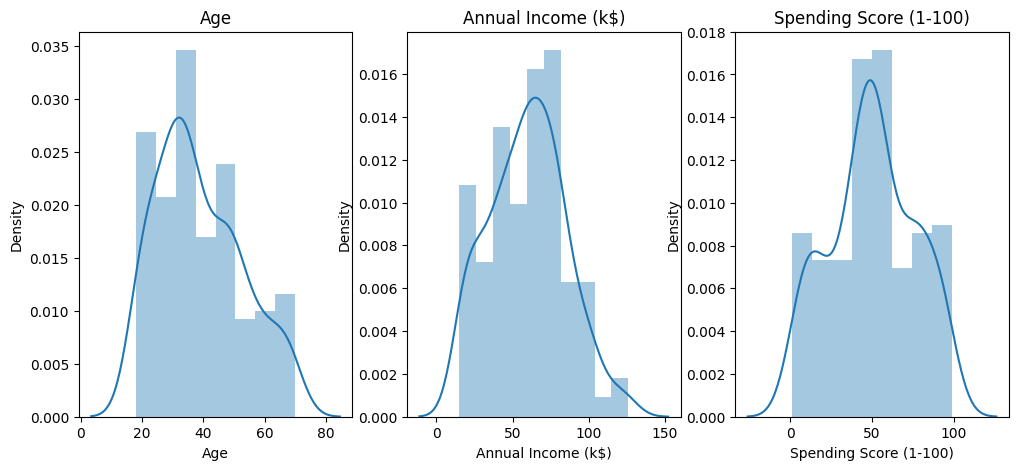

In [11]:
#plotting histogram
col_to_check=['Age','Annual Income (k$)','Spending Score (1-100)']
j=1
plt.figure(figsize=(12,17))
for i in col_to_check:
    plt.subplot(len(col_to_check),3,j)
    sns.distplot(df[i])
    plt.title(i)
    j=j+1

we can see that Most customers visiting Mall have Annual Income of 50k to 90k

<AxesSubplot:>

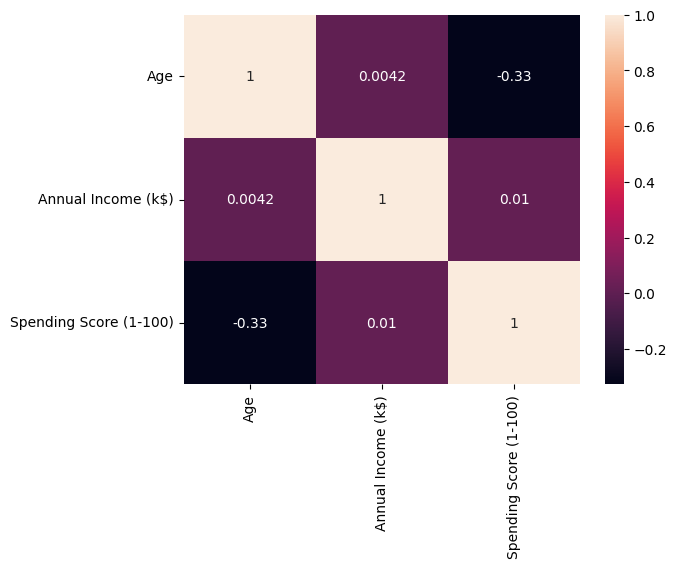

In [12]:
sns.heatmap(df.corr(),annot=True)

here we can infer that, there is no multicolinearity 

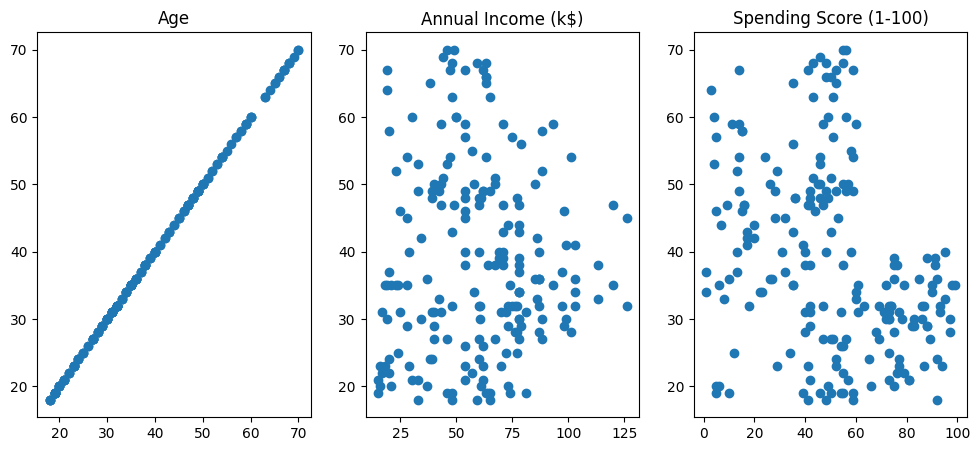

In [13]:
#plotting histogram
col_to_check=['Age','Annual Income (k$)','Spending Score (1-100)']
j=1
plt.figure(figsize=(12,17))
for i in col_to_check:
    plt.subplot(len(col_to_check),3,j)
    plt.scatter(df[i],df['Age'])
    plt.title(i)
    j=j+1

In [14]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Gender'>

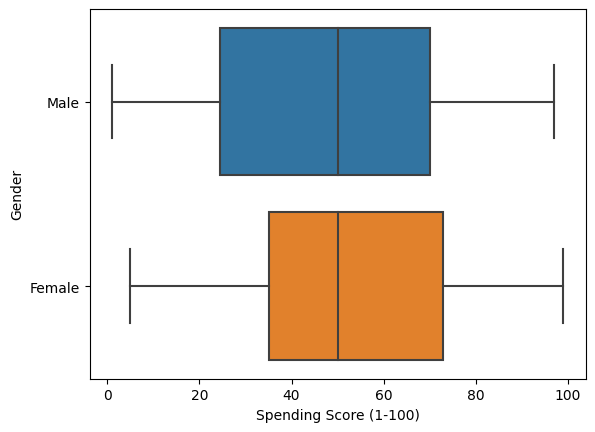

In [15]:
sns.boxplot(data=df, y='Gender', x='Spending Score (1-100)')

In [16]:
df.groupby('Gender')['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Gender'>

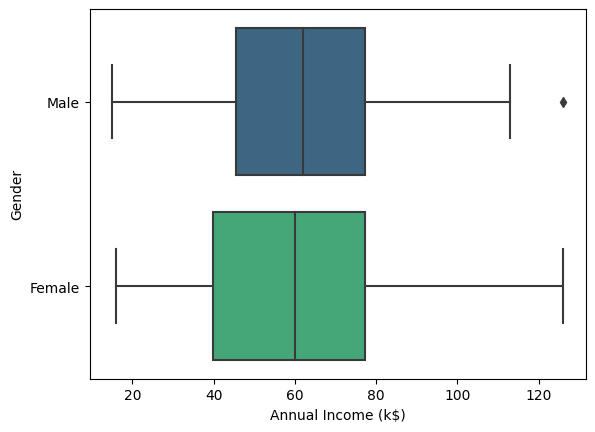

In [17]:
sns.boxplot(data=df, y='Gender', x='Annual Income (k$)', palette='viridis')

In [18]:
df.groupby('Gender')['Annual Income (k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,59.25,26.011952,16.0,39.75,60.0,77.25,126.0
Male,88.0,60.49,24.043423,15.0,45.50,62.0,77.25,126.0


<AxesSubplot:xlabel='Age', ylabel='Gender'>

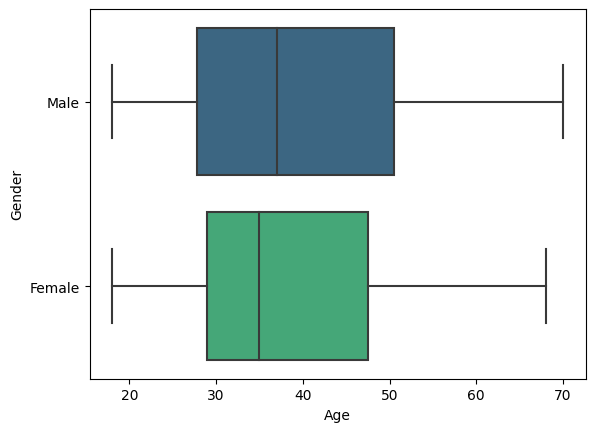

In [19]:
sns.boxplot(data=df, y='Gender', x='Age', palette='viridis')

In [20]:
df.groupby('Gender')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0
Male,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0


# encoding

In [21]:
df = pd.get_dummies(df, drop_first=True)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15.00,39,1
1,21,15.00,81,1
2,20,16.00,6,0
3,23,16.00,77,0
4,31,17.00,40,0
...,...,...,...,...
195,35,120.00,79,0
196,45,126.00,28,0
197,32,126.00,74,1
198,32,60.56,18,1


# scaling of the data

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Model builing

## KMeans

In [23]:
from sklearn.cluster import KMeans

In [24]:
#elbow technique to fine best k values

In [25]:
ssd = [] # An empty list for sum of squared distances to be appended for k values 2 to 10

for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    ssd.append(model.inertia_)

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory le

Text(0, 0.5, 'Sum of Squared Distances')

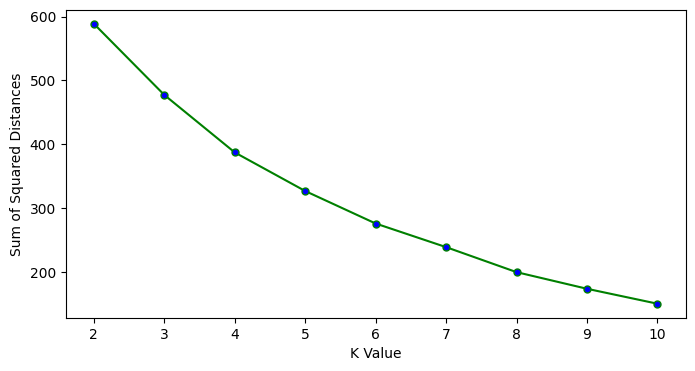

In [26]:
#Plotting ssd vs k values.
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(2,11), ssd, marker='o', color='green', markerfacecolor='blue', markersize=5)
plt.xlabel("K Value");
plt.ylabel("Sum of Squared Distances")

There is no clear 'elbow' but k = 5 seems to be a good choice as the ssd has decreased noticably by the time k value reaches 5.

In [27]:
# lets create a model with k=5
model = KMeans(n_clusters=5)
model.fit(scaled_df)

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [36]:
k_means_labels = model.fit_predict(df)
k_means_labels

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [35]:
#Let's plot a 3-D scatterplot along with the customers separated by gender based on shapes - circle and diamond.
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=model.fit_predict(df), symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside")) 

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [30]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [33]:
print(silhouette_score(scaled_df, k_means_labels))

0.3167138187837371


In [32]:
# finding silhouette score for different clusters values
for i in range(2,10):
    k_means = KMeans(n_clusters=i, max_iter = 300, init = 'k-means++',random_state = 0,n_init = 10)
    cluster_labels=k_means.fit_predict(scaled_df)
    print(silhouette_score(scaled_df, cluster_labels))

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.2506351148927164


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.2601843505409904


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.2968713217945148


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.31739966124053415


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.33414668741487247


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.3564667545934057


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.3906617281241047


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.40256143010060896


# without scaling

In [37]:
ssd = [] # An empty list for sum of squared distances to be appended for k values 2 to 10

for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    ssd.append(model.inertia_)

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less 

Text(0, 0.5, 'Sum of Squared Distances')

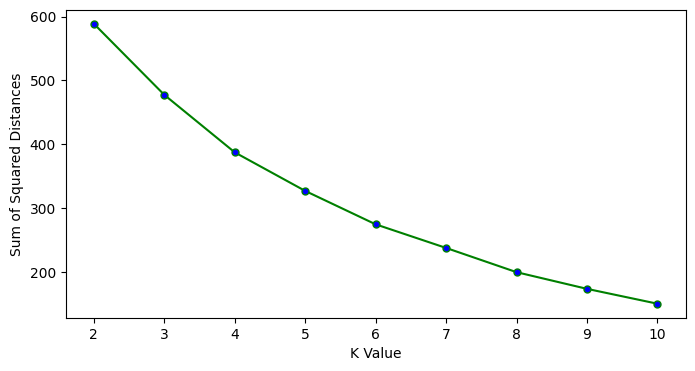

In [38]:
#Plotting ssd vs k values.
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(2,11), ssd, marker='o', color='green', markerfacecolor='blue', markersize=5)
plt.xlabel("K Value");
plt.ylabel("Sum of Squared Distances")

In [39]:
# lets create a model with k=5
model = KMeans(n_clusters=5)
model.fit(df)

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=5)

In [40]:
k_means_labels = model.fit_predict(df)
k_means_labels

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [41]:
#Let's plot a 3-D scatterplot along with the customers separated by gender based on shapes - circle and diamond.
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=model.fit_predict(df), symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside")) 

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [42]:
# finding silhouette score for different clusters values
for i in range(2,10):
    k_means = KMeans(n_clusters=i, max_iter = 300, init = 'k-means++',random_state = 0,n_init = 10)
    cluster_labels=k_means.fit_predict(df)
    print(silhouette_score(df, cluster_labels))

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.2989529668393932


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.37510276297451356


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.40400141581683185


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.4453993399485103


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.45544678922248577


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.43776095500954226


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.4028635091763508


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.38353295565983847


#### now without scaling it gives 45% of silhouette_score at k=6

## Hierarchical Clustering

In [44]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [45]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [46]:
cluster_labels = model.fit_predict(df)
cluster_labels

array([199, 132, 105, 197, 189, 154, 117, 135, 153, 129, 100, 172, 118,
       188, 131, 169, 184, 147, 157, 140, 146, 139, 143, 191, 127, 111,
       156, 123, 187, 112, 116, 109, 119, 113, 110, 124, 173, 163, 101,
       177,  99, 151,  54, 174, 133, 183, 144,  65, 196, 141, 181, 128,
       142, 134, 165, 138, 114, 136, 120, 175,  91, 152, 170, 179,  84,
        49,  63,  93, 150, 107, 155, 167, 122,  61, 164, 176,  66, 126,
       171,  85,  56, 115, 137, 190, 178, 102, 166,  57, 159, 160,  77,
        69, 192, 130, 193,  88, 106,  81, 125, 158, 194,  94, 103,  75,
       149,  78, 195,  70, 148,  52, 180, 121,  89,  86,  96,  76, 104,
       186,  74,  55,  68,  87,  64, 162, 145,  59,  27, 182,  58, 198,
       168, 185,  62,  46,  37,  72,  73,  28,  51,  82,  67,  71, 161,
        83,  50,  32,  30,  95,  41,  24,  90,  44,  92,  60,  38,  13,
        45,  36,  42,  80,  79,  43,  47,  31, 108,  29,  97,  40,  35,
        20,  39,  33,  22,  34,  25,  53,  18,  16,  26,  15,  1

In [47]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix[:][:5] # display only 5 rows
# format: point 1, point 2, distance between the points, number of points in the cluster

array([[ 76.        , 113.        ,   1.41421356,   2.        ],
       [ 43.        ,  88.        ,   1.41421356,   2.        ],
       [  9.        ,  45.        ,   1.41421356,   2.        ],
       [ 46.        ,  91.        ,   1.41421356,   2.        ],
       [ 24.        ,  94.        ,   1.41421356,   2.        ]])

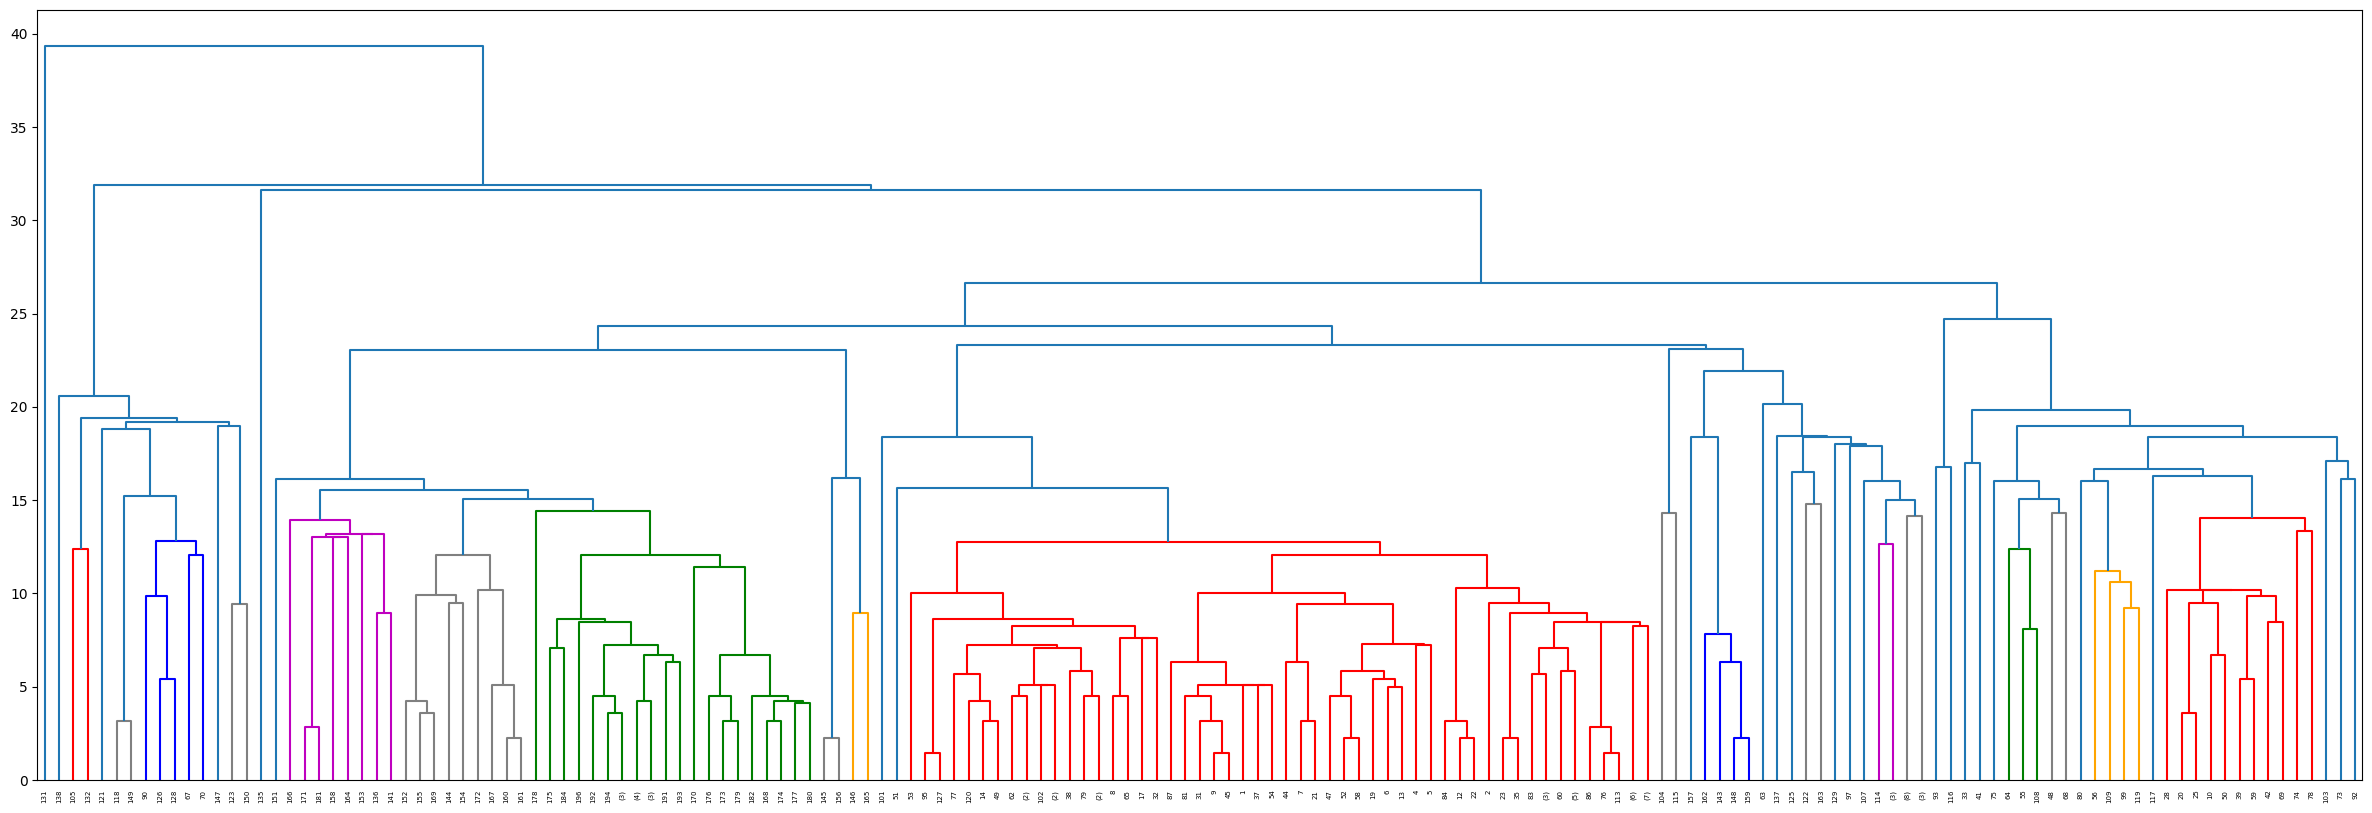

In [48]:
plt.figure(figsize=(30,10))
hierarchy.set_link_color_palette(['r','grey', 'b', 'grey', 'm', 'grey', 'g', 'grey', 'orange']) # set colors for the clusters
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=15, color_threshold=15)

In [57]:
model = AgglomerativeClustering(n_clusters=5)
pred=model.fit_predict(df) # predict the categories for each point.
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [58]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=model.fit_predict(df), symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))
# fig.show()

In [59]:
print(silhouette_score(df, pred))

0.44203466214559584
